# Feature Engineering - Cleaning Datasets
#### Feature names: times_pregnant, plasma_glucose, diastolic_blood, skin_thickness, serum_insulin, bmi, pedigree_function, age, diabetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
feature = ['times_pregnant', 'plasma_glucose', 'diastolic_blood', 'skin_thickness', 'serum_insulin', 
           'bmi', 'pedigree_function', 'age', 'diabetes']
df = pd.read_csv("pima.data", names = feature, header=None)
df.head()

,times_pregnant,plasma_glucose,diastolic_blood,skin_thickness,serum_insulin,bmi,pedigree_function,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

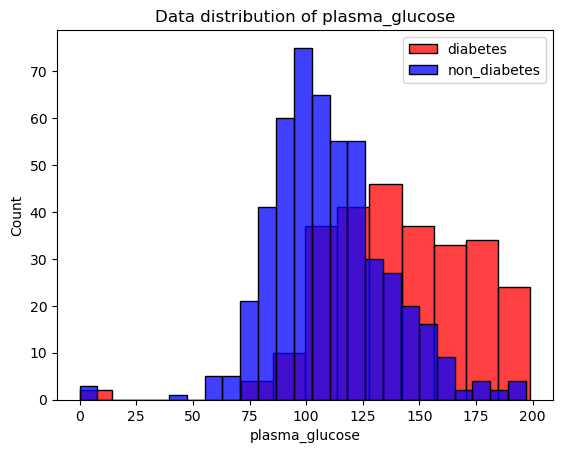

In [4]:
# data distribution of plasma_glucose for both classes (have diabetes or not diabetes). Draw conclusion.
diabetes = df[df['diabetes']==1]
non_diabetes = df[df['diabetes']==0]

sns.histplot(diabetes,x='plasma_glucose',color='red', label = 'diabetes')
sns.histplot(non_diabetes,x='plasma_glucose',color='blue',label = 'non_diabetes')
plt.title('Data distribution of plasma_glucose')
plt.legend()

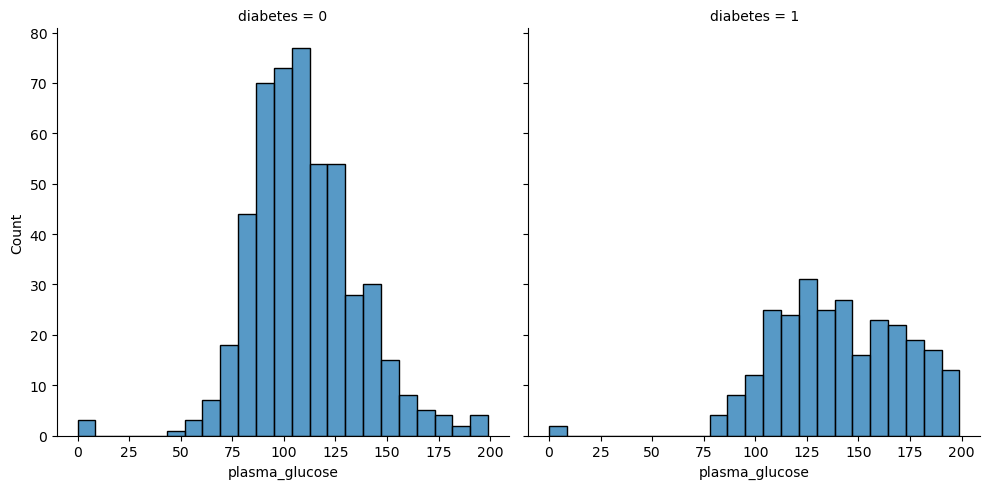

In [5]:
sns.displot(data=df, x = 'plasma_glucose', col = 'diabetes')

In [6]:
# check the null values? How many have you found?
df.isnull().sum()

times_pregnant       0
plasma_glucose       0
diastolic_blood      0
skin_thickness       0
serum_insulin        0
bmi                  0
pedigree_function    0
age                  0
diabetes             0
dtype: int64

In [7]:
df['diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: diabetes, dtype: float64

In [8]:
# proportion of people with or without diabetics
# with: 34.9%
# without: 65.1%

In [9]:
# Show the statistical description of the features.
# What conclusion would you like to draw?
# Any interesting/critical/suspecious observation?
df.describe()

,times_pregnant,plasma_glucose,diastolic_blood,skin_thickness,serum_insulin,bmi,pedigree_function,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df['plasma_glucose'].isnull().sum()

0

In [11]:
# Replace the 0's by None values for those 5 columns.
cols = ["plasma_glucose", "diastolic_blood", "skin_thickness", "serum_insulin", "bmi"]
df[cols] = df[cols].replace(['0', 0], np.nan)
df.head()

,times_pregnant,plasma_glucose,diastolic_blood,skin_thickness,serum_insulin,bmi,pedigree_function,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
columns = ['plasma_glucose', 'diastolic_blood', 'skin_thickness', 'serum_insulin', 'bmi']
for column in columns:
    df[column].replace(0, np.NaN, inplace=True)
df.head()

,times_pregnant,plasma_glucose,diastolic_blood,skin_thickness,serum_insulin,bmi,pedigree_function,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [13]:
df.isnull().sum().sum()

652

In [14]:
df.describe()

,times_pregnant,plasma_glucose,diastolic_blood,skin_thickness,serum_insulin,bmi,pedigree_function,age,diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df_dropped = df.dropna()

In [16]:
df_dropped.isnull().sum()

times_pregnant       0
plasma_glucose       0
diastolic_blood      0
skin_thickness       0
serum_insulin        0
bmi                  0
pedigree_function    0
age                  0
diabetes             0
dtype: int64

In [17]:
df_dropped['diabetes'].value_counts(normalize=True)

0    0.668367
1    0.331633
Name: diabetes, dtype: float64

In [18]:
df.mean()

times_pregnant         3.845052
plasma_glucose       121.686763
diastolic_blood       72.405184
skin_thickness        29.153420
serum_insulin        155.548223
bmi                   32.457464
pedigree_function      0.471876
age                   33.240885
diabetes               0.348958
dtype: float64

In [19]:
df_dropped.mean()

times_pregnant         3.301020
plasma_glucose       122.627551
diastolic_blood       70.663265
skin_thickness        29.145408
serum_insulin        156.056122
bmi                   33.086224
pedigree_function      0.523046
age                   30.864796
diabetes               0.331633
dtype: float64

<AxesSubplot:>

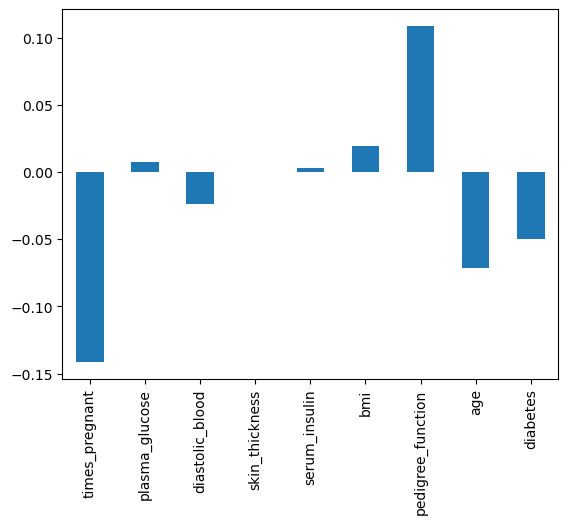

In [20]:
((df_dropped.mean() - df.mean()) / df.mean()).plot(kind = 'bar')

In [21]:
df.isnull().sum()

times_pregnant         0
plasma_glucose         5
diastolic_blood       35
skin_thickness       227
serum_insulin        374
bmi                   11
pedigree_function      0
age                    0
diabetes               0
dtype: int64

In [22]:
df['plasma_glucose'].fillna(df['plasma_glucose'].mean(), inplace=True)

In [23]:
df['plasma_glucose'].isnull().sum()

0

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
imputer = SimpleImputer(strategy='mean')

In [26]:
imputer_transformed = imputer.fit_transform(df)

In [27]:
imputer_transformed

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [28]:
df_imputed = pd.DataFrame(imputer_transformed, columns=feature)
df_imputed.head()

,times_pregnant,plasma_glucose,diastolic_blood,skin_thickness,serum_insulin,bmi,pedigree_function,age,diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


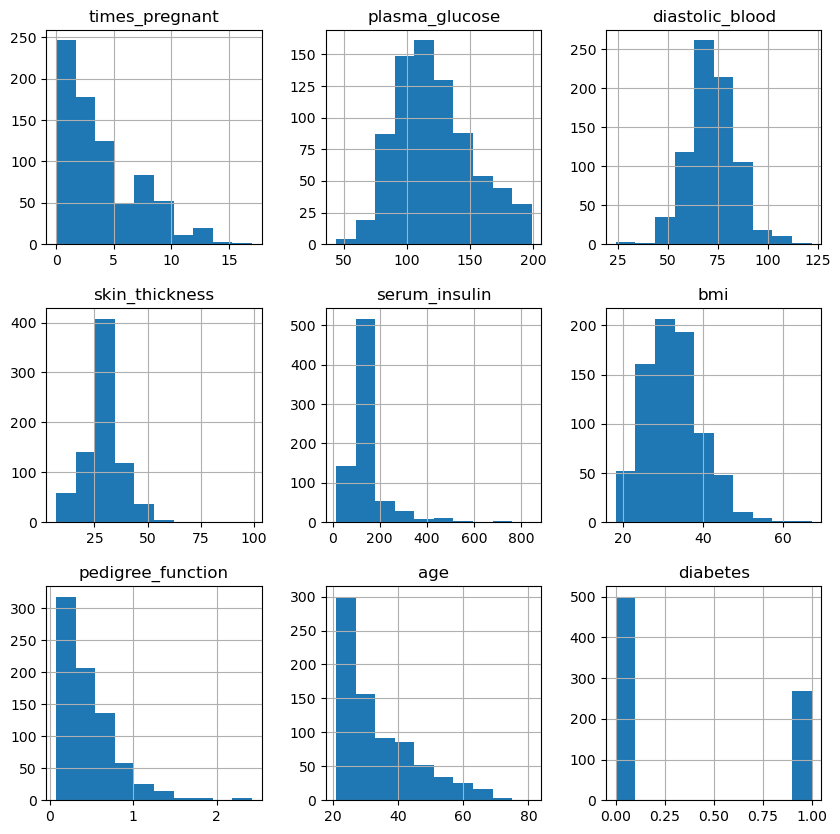

In [29]:
df_imputed.hist(figsize=(10,10))
plt.show()

In [30]:
df_imputed.describe()

,times_pregnant,plasma_glucose,diastolic_blood,skin_thickness,serum_insulin,bmi,pedigree_function,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


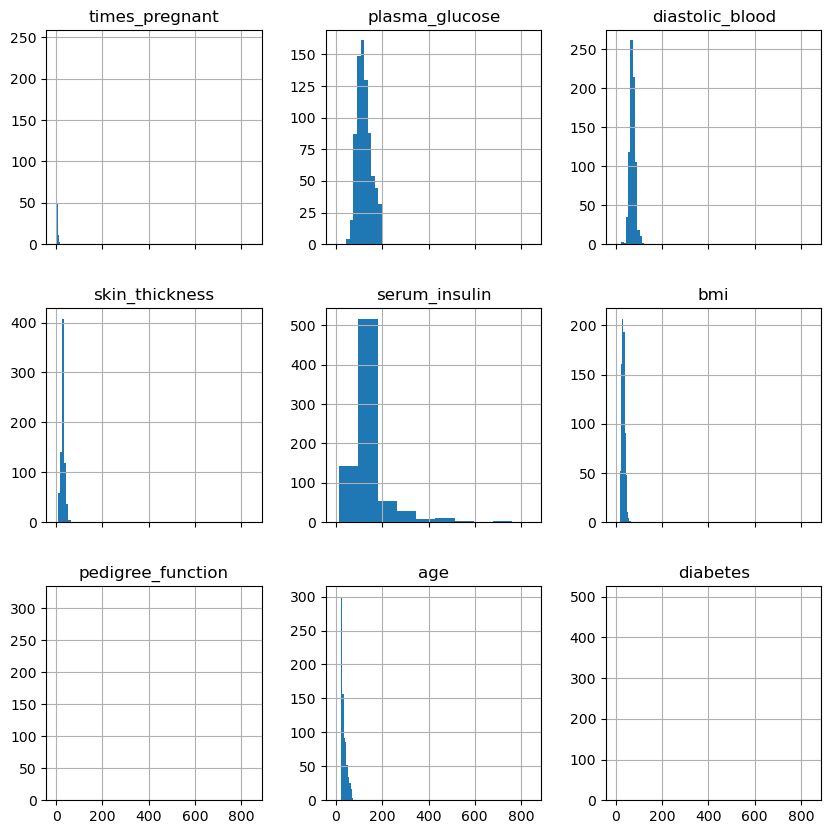

In [31]:
df_imputed.hist(figsize=(10,10), sharex=True)
plt.show()

In [32]:
df['plasma_glucose'].head()

0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: plasma_glucose, dtype: float64

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
plasma_Zscore = scaler.fit_transform(df[['plasma_glucose']])

In [36]:
print(df['plasma_glucose'].mean())
print(df['plasma_glucose'].std())

121.68676277850587
30.43594886720766


In [37]:
print(plasma_Zscore.mean())
print(plasma_Zscore.std())

-3.561965537339044e-16
1.0


In [38]:
df_imputed_zscore = scaler.fit_transform(df_imputed)
df_imputed_zscore

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  2.0158134 , -0.69530596, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [39]:
df_imputed_zscore = pd.DataFrame(df_imputed_zscore, columns=feature)
df_imputed_zscore.head()

,times_pregnant,plasma_glucose,diastolic_blood,skin_thickness,serum_insulin,bmi,pedigree_function,age,diabetes
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1.365896
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,-0.732120
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1.365896
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1.365896


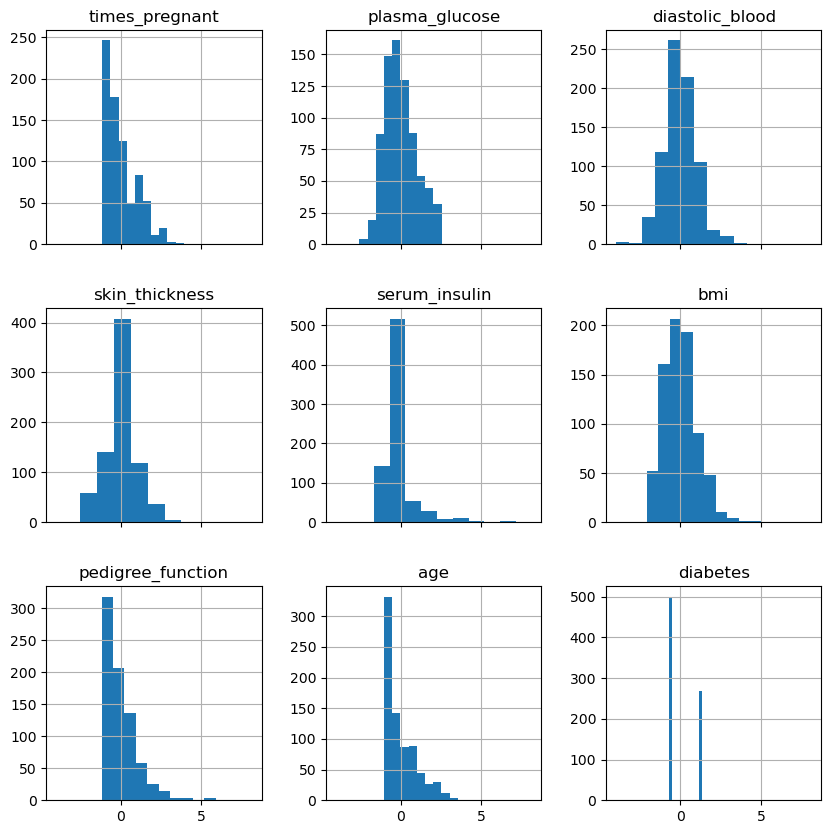

In [40]:
df_imputed_zscore.hist(figsize=(10,10), sharex=True)
plt.show()

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
min_max = MinMaxScaler()

In [44]:
df_imputed_minMax = min_max.fit_transform(df_imputed)

In [46]:
df_imputed_minMax

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.10119556, 0.03333333,
        0.        ]])

In [47]:
df_imputed_minMax = pd.DataFrame(df_imputed_minMax, columns=feature)
df_imputed_minMax.head()

,times_pregnant,plasma_glucose,diastolic_blood,skin_thickness,serum_insulin,bmi,pedigree_function,age,diabetes
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
